In [101]:
#import libraries for data handling, visualization, and modeling
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


In [102]:
#loading the world happiness report dataset
CSV_PATH = "World-happiness-report-updated_2024.csv"

#display the first couple rows and info in dataset
df = pd.read_csv(CSV_PATH, encoding='latin1') 

display(df.head())
print(df.info())

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB
None


In [103]:
#define the target variable and the featured columns
TARGET = "Life Ladder"  
FEATURES = [
    "Log GDP per capita",
    "Social support",
    "Healthy life expectancy at birth",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
]

#keep only rows where target exists
df = df.dropna(subset=[TARGET]).copy()

#check for missing values in features
print(df[FEATURES].isnull().sum())

#fill missing feature values with column means
X = df[FEATURES].copy().fillna(df[FEATURES].mean(numeric_only=True))
y = df[TARGET].copy()

Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
dtype: int64


In [104]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Available columns: ['Country name', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Life Ladder
count,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2363.000000
mean,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,5.483566
std,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,1.125522
min,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,1.281000
25%,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,4.647000
50%,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,5.449000
75%,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,6.323500
max,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,8.019000


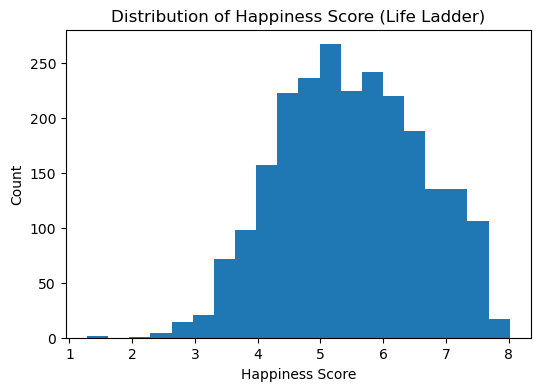

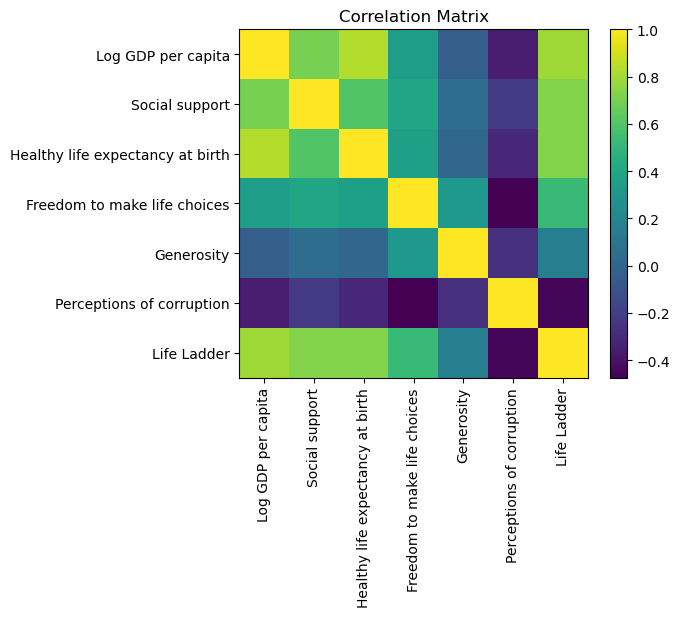

In [105]:
#print columns in the dataset to check the names
print("Available columns:", df.columns.tolist())

#check if all of the features and the target columns are in the dataset
for col in FEATURES + [TARGET]:
    if col not in df.columns:
        print(f"Warning: '{col}' is not in the DataFrame columns")

#only go forward if all of the required columns are there
if all(col in df.columns for col in FEATURES + [TARGET]):
  #show the summary statistics for the columns
    display(df[FEATURES + [TARGET]].describe(include="all"))
    
  #create a histogram to show the distribution of happiness score
    plt.figure(figsize=(6,4))
    plt.hist(df[TARGET].dropna(), bins=20)
    plt.title("Distribution of Happiness Score (Life Ladder)")
    plt.xlabel("Happiness Score")
    plt.ylabel("Count")
    plt.show()
    
  #correlation matrix to see how features connect to each other
    num_df = df[FEATURES + [TARGET]].select_dtypes(include=[np.number]).dropna()
    corr = num_df.corr().values
    labels = num_df.columns.tolist()

    #plot the correlation matrix as a heatmap
    plt.figure(figsize=(7,6))
    plt.imshow(corr, interpolation="nearest")
    plt.colorbar()
    plt.xticks(range(len(labels)), labels, rotation=90)
    plt.yticks(range(len(labels)), labels)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

In [106]:
#make a linear regression model
model = LinearRegression()
#train the model using the training data
model.fit(X_train, y_train)

#print the intercept and coefficients for each feature
print(f"Intercept: {model.intercept_}")
print("Coefficients (feature -> coefficient):")
for f, c in zip(FEATURES, model.coef_):
    print(f"  {f:30s} {c:.6f}")


Intercept: -2.2495997840260413
Coefficients (feature -> coefficient):
  Log GDP per capita             0.355233
  Social support                 2.785781
  Healthy life expectancy at birth 0.025808
  Freedom to make life choices   1.239671
  Generosity                     0.537093
  Perceptions of corruption      -0.578191


In [107]:
#use trained model to predict happiness on the data
y_pred = model.predict(X_test)
#compare actual vs. predicted values
predictions = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
display(predictions.head())

,Actual,Predicted
0,5.252,5.472148
1,6.553,6.125941
2,5.549,4.323853
3,4.554,5.018914
4,6.013,5.370431


In [108]:
#calculate RMSE (error) and R^2 (model accuracy)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

RMSE: 0.5902
R-squared: 0.7228


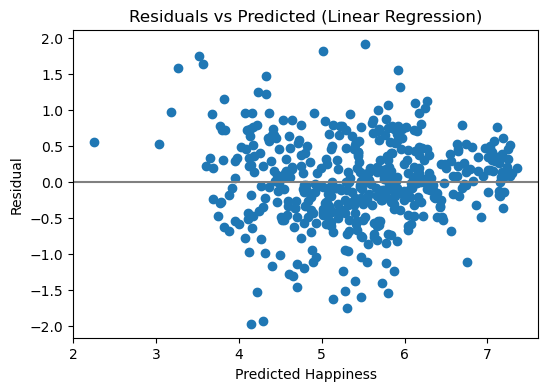

In [109]:
#calculate and plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color="gray")
plt.title("Residuals vs Predicted (Linear Regression)")
plt.xlabel("Predicted Happiness")
plt.ylabel("Residual")
plt.show()

In [110]:
#define the features for Experiment 2
FEATURES_EXP2 = [
    "Log GDP per capita",
    "Social support",
    "Healthy life expectancy at birth",
    "Freedom to make life choices",
    "Perceptions of corruption",
]

X2 = df[FEATURES_EXP2].copy().fillna(df[FEATURES_EXP2].mean(numeric_only=True))
y2 = df[TARGET].copy()
#split data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

#scale the features so that they are comparable
scaler = StandardScaler()
X_train2_s = scaler.fit_transform(X_train2)
X_test2_s = scaler.transform(X_test2)


In [111]:
#make ridge regression model
ridge = Ridge(alpha=1.0)
#train the model using the scaled training data
ridge.fit(X_train2_s, y_train2)
#predict happiness values on the data
y_pred_3 = ridge.predict(X_test2_s)

In [112]:
#make a table that shows how much each feature influences the model
coef_table_3 = pd.DataFrame({
    "feature": FEATURES_EXP2,
    "coef_ridge": ridge.coef_,
}).sort_values("coef_ridge", ascending=False)


Exp 2 -> RMSE: 0.5949 | R²: 0.7184


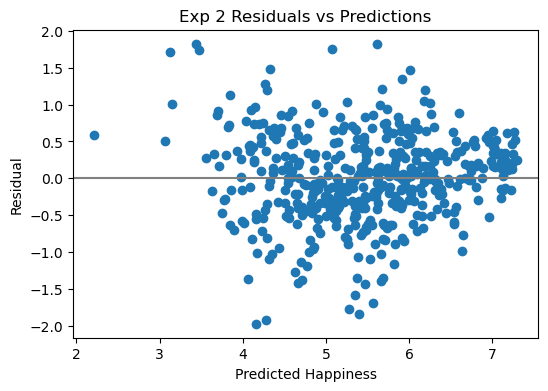

In [113]:
#make a new linear regression model
linreg_2 = LinearRegression()

#train the model on the scaled training data
linreg_2.fit(X_train2_s, y_train2)

#make predictions on the test set
y_pred_2 = linreg_2.predict(X_test2_s)
#evaluate the model using RMSE and R^2
rmse_2 = np.sqrt(mean_squared_error(y_test2, y_pred_2))
r2_2   = r2_score(y_test2, y_pred_2)
print(f"Exp 2 -> RMSE: {rmse_2:.4f} | R²: {r2_2:.4f}")

#plot residuals
resid_2 = y_test2 - y_pred_2
plt.figure(figsize=(6,4))
plt.scatter(y_pred_2, resid_2)
plt.axhline(0, color="gray")
plt.title("Exp 2 Residuals vs Predictions")
plt.xlabel("Predicted Happiness")
plt.ylabel("Residual")
plt.show()

Exp 3 -> RMSE: 0.5949 | R²: 0.7184


,feature,coef_ridge
0,Log GDP per capita,0.396574
1,Social support,0.341790
3,Freedom to make life choices,0.195662
2,Healthy life expectancy at birth,0.173353
4,Perceptions of corruption,-0.118341


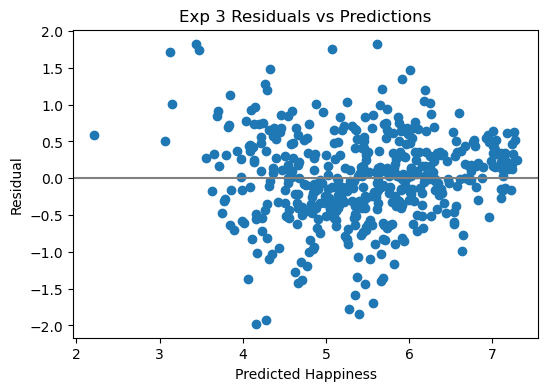

In [114]:
#make ridge regression model
ridge = Ridge(alpha=1.0)
#train the ridge model using the scaled data
ridge.fit(X_train2_s, y_train2)
#predict happiness value  on the test data
y_pred_3 = ridge.predict(X_test2_s)
#calculate model performance
rmse_3 = np.sqrt(mean_squared_error(y_test2, y_pred_3))
r2_3   = r2_score(y_test2, y_pred_3)
print(f"Exp 3 -> RMSE: {rmse_3:.4f} | R²: {r2_3:.4f}")

#make a table that shows feature significance
coef_table_3 = pd.DataFrame({"feature": FEATURES_EXP2, "coef_ridge": ridge.coef_}) \
                 .sort_values("coef_ridge", ascending=False)
display(coef_table_3)

#plot residuals
resid_3 = y_test2 - y_pred_3
plt.figure(figsize=(6,4))
plt.scatter(y_pred_3, resid_3)
plt.axhline(0, color="gray")
plt.title("Exp 3 Residuals vs Predictions")
plt.xlabel("Predicted Happiness")
plt.ylabel("Residual")
plt.show()


In [115]:
#make a summary table showing RMSE and R^2 for all of the experiments
summary = pd.DataFrame({
    "Experiment": [
        "Exp 1: Linear (raw)",
        "Exp 2: Linear (scaled + selected)",
        "Exp 3: Ridge (scaled + selected)"
    ],
    "RMSE": [rmse, rmse_2, rmse_3],
    "R2":   [r2,   r2_2,   r2_3]
})
display(summary)


,Experiment,RMSE,R2
0,Exp 1: Linear (raw),0.590228,0.722768
1,Exp 2: Linear (scaled + selected),0.594866,0.718394
2,Exp 3: Ridge (scaled + selected),0.594867,0.718393
